In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

**DATA:**

the data is taken from the website - https://www.kaggle.com/datasets/mustafaali96/weight-height?resource=download

In [9]:
df=pd.read_csv("weight-height.csv")
print(df.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


**DATA VISUALIZATION:**

Plotting a histogram depicting the number of people having a particular height.

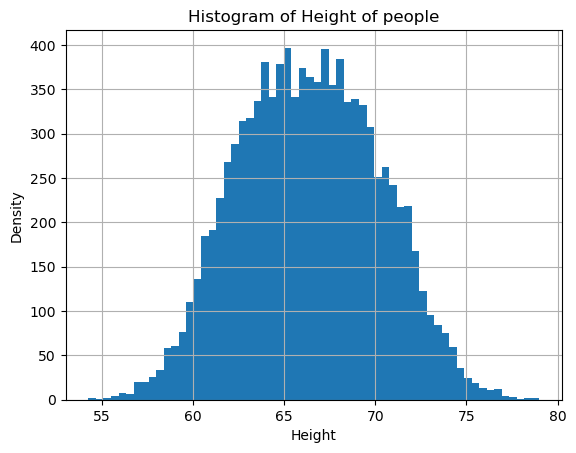

In [13]:
plt.hist(df["Height"], bins =60)
plt.xlabel("Height")
plt.ylabel("Density")
plt.title("Histogram of Height of people")
plt.grid()
plt.show()

**FITTING DISTRIBUTION**

- The function estimates the parameters of a normal distribution that best fit the "Height" data.
- It finds the mean (μ) and standard deviation (σ) that maximize the likelihood of observing the dataset under a normal distribution.

In [37]:
loc, scale = stats.norm.fit(df["Height"])
loc, scale

(66.36755975482124, 3.84733573955754)

- loc → Mean (μ) of the normal distribution.
- scale → Standard deviation (σ) of the normal distribution.

In [33]:
x_vals = np.linspace(min(df["Height"]), max(df["Height"]), 1000)

__Plotting PDF(Probability Density Function) for the Height dataset__

The Probability Density Function (PDF) of a normal distribution describes the likelihood of a continuous random variable taking on a specific value. It is mathematically defined as:
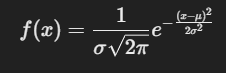
where,
- f(x) → Probability density at point 𝑥.
- 𝜇 → Mean (expected value) of the distribution (center of the bell curve).
- 𝜎 → Standard deviation (spread of the distribution).
- 𝜎^2 → Variance.

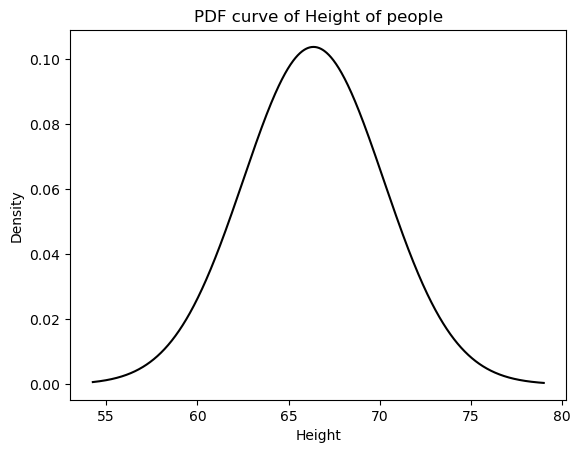

In [41]:
pdf=stats.norm.pdf(x_vals, loc=loc, scale=scale)
plt.plot(x_vals, pdf, color="black")
plt.xlabel("Height")
plt.ylabel("Density")
plt.title("PDF curve of Height of people")
plt.show()

**Comparing histogram with the pdf curve**

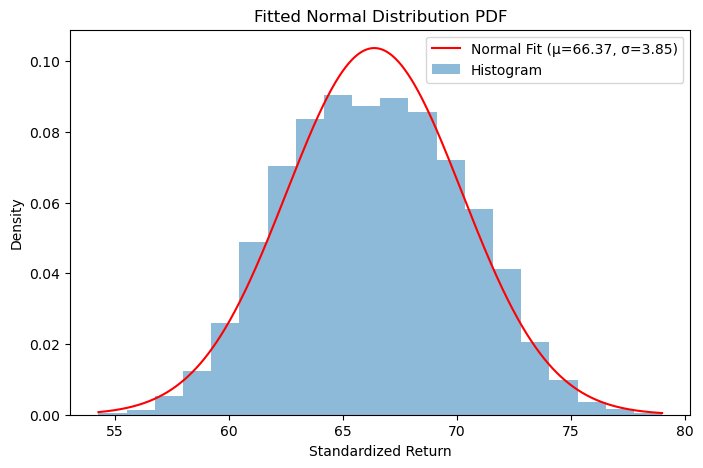

In [26]:
# Fit a normal distribution
mu, sigma = stats.norm.fit(df["Height"])  # Should be close to (0,1) for standardized data

# Generate PDF values
x_vals = np.linspace(min(df["Height"]), max(df["Height"]), 1000)
pdf_vals = stats.norm.pdf(x_vals, mu, sigma)

# Plot the fitted normal distribution
plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, label=f"Normal Fit (μ={mu:.2f}, σ={sigma:.2f})", color='red')
plt.hist(df["Height"], bins=20, density=True, alpha=0.5, label="Histogram")
plt.xlabel("Standardized Return")
plt.ylabel("Density")
plt.title("Fitted Normal Distribution PDF")
plt.legend()
plt.show()

Interpretation:
- If the histogram closely follows the fitted red curve, it means the data is well-approximated by a normal distribution.
- If the histogram deviates significantly, the normal distribution might not be a good fit, and you might need to try other distributions (e.g., stats.expon.fit() for exponential, stats.lognorm.fit() for log-normal).

**Why we cannot plot a PMF of this dataset?**
- *PMF V/S PDF*
1. PMF is for Discrete Data
The PMF (Probability Mass Function) applies to discrete random variables, meaning variables that take on countable values (e.g., number of students, number of cars).
It gives the probability of exact values occurring.

2. PDF is for Continuous Data
Our dataset consists of continuous stock returns (e.g., real numbers like 0.52, -1.23, 1.89).
For continuous distributions, the probability of a single exact value occurring is zero because there are infinitely many possible values.
Instead of a PMF, we use a Probability Density Function (PDF) to describe the relative likelihood of values falling within an interval.

Since stock returns are continuous, we cannot use a PMF. Instead, we must use a PDF (such as a normal distribution or kernel density estimation) to describe their distribution.

**Plotting CDF(Cummulative Distribution Function) for the height dataset**

- The Cumulative Distribution Function (CDF) gives the probability that a random variable 𝑋 is less than or equal to a specific value 𝑥, i.e.,
F(x)=P(X≤x)
- It helps in understanding the cumulative probability of the data.

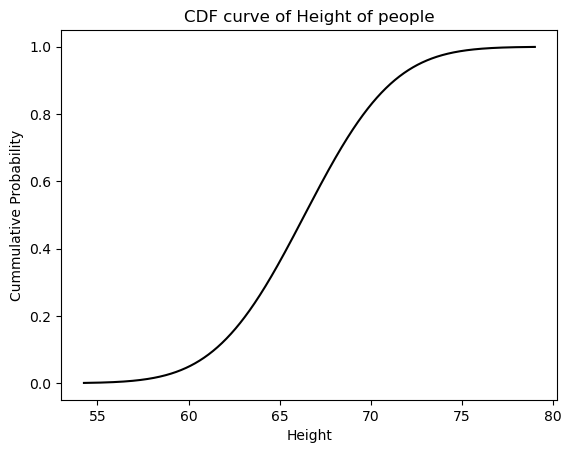

In [54]:
cdf=stats.norm.cdf(x_vals, loc=loc, scale=scale)
plt.plot(x_vals, cdf, color="black")
plt.xlabel("Height")
plt.ylabel("Cummulative Probability")
plt.title("CDF curve of Height of people")
plt.show()

**Plotting PPF(Percent Point Function) for the height dataset**

PPF
The Percent-Point Function (PPF) is the inverse of the Cumulative Distribution Function (CDF). It is also called the quantile function because it helps find the value of a random variable at a given probability.

In simple terms, if:

𝐹(𝑥)=𝑃(𝑋≤𝑥)

then PPF finds 𝑥 for a given probability 𝑝, i.e.,
𝑥=𝐹−1(𝑝)

This helps in determining critical values for a normal distribution.


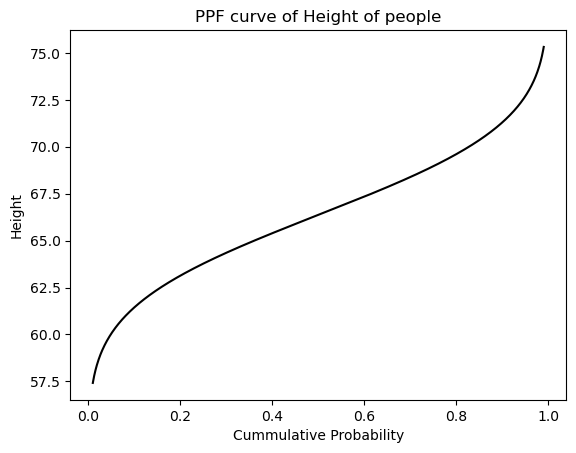

In [61]:
p_vals = np.linspace(0.01, 0.99, 1000)
ppf=stats.norm.ppf(p_vals, loc=loc, scale=scale)
plt.plot(p_vals, ppf, color="black")
plt.ylabel("Height")
plt.xlabel("Cummulative Probability")
plt.title("PPF curve of Height of people")
plt.show()

**Use of CDF**

Finding the probability that the variable X takes values lower than 70 and then representing it graphically

In [65]:
cdf_1=stats.norm.cdf(70, loc=loc, scale=scale)
cdf_1

0.827452052034947

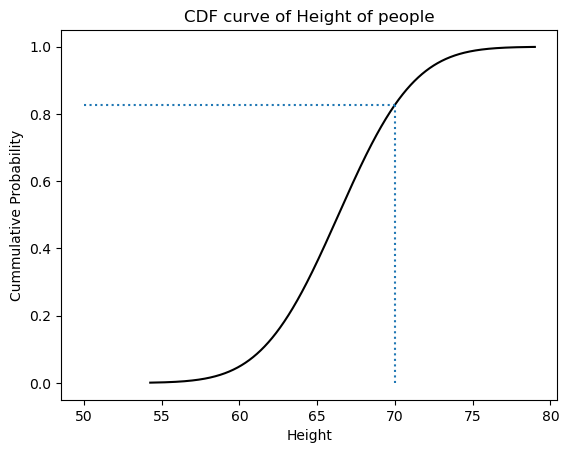

In [69]:
cdf=stats.norm.cdf(x_vals, loc=loc, scale=scale)
plt.plot(x_vals, cdf, color="black")
plt.vlines(70, 0, cdf_1, linestyle=":")
plt.hlines(cdf_1, 50, 70, linestyle=":")
plt.xlabel("Height")
plt.ylabel("Cummulative Probability")
plt.title("CDF curve of Height of people")
plt.show()

**Real world usage of Normal distribution**

The normal distribution (Gaussian distribution) appears in many real-world scenarios because of the Central Limit Theorem (CLT), which states that the sum of many independent random variables tends to follow a normal distribution. Here are some real-world applications:

1. Human Characteristics (Height, Weight, IQ, etc.)
2. Test Scores (SAT, IQ, GRE, etc.)
3. Measurement Errors in Experiments
4. Financial Markets (Stock Prices & Returns)
5. Blood Pressure & Other Medical Metrics
6. Manufacturing & Quality Control
7. Signal Processing & Communication Systems
8. Sports Performance & Player Statistics
9. Physics & Natural Phenomena

Hence, the normal distribution is essential for understanding data patterns, making predictions, and conducting statistical analyses. Its predictability and mathematical properties make it a cornerstone in probability theory, science, and engineering.